<a href="https://colab.research.google.com/github/satishgunjal/Kaggle-Projects/blob/master/01_Linear_Regression_Multivariate/Multivariate_Linear_Regression_Fish_Weight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
 
![header.png](https://raw.githubusercontent.com/satishgunjal/images/master/fish.png)
 
In this study I will create a machine learning model to predict the weight of the fish based on the body measurement data of seven types of fish species. You can download the dataset from Kaggle. [Fish market](https://www.kaggle.com/aungpyaeap/fish-market)
 
I am going to use Linear model from sklearn library. Since there are multiple features its **Multiple/Multivariate/Multi Variable Linear Regression** problem.
 
I have documented the code and tried to explain every important concept or library I have using during this study. I hope it will be helpful.
 
#kaggle #linearregression #multiplelinearregression #python



# Step 1: Import The Required Libraries
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* pandas: Used for data manipulation and analysis
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* seaborn : It is also data visualization library, based on matplotlib
* linear_model: Sklearn linear regression model
* train_test_split : helper function from Sklearn library for splitting the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 2: Load The Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/satishgunjal/datasets/master/Fish.csv")
print('Shape of dataset= ', df.shape) # To get no of rows and columns
df.head(5) # head(n) returns first n records only. Can also use sample(n) for random n records.

Shape of dataset=  (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


 
# Step 3: Understand The Data
* There are total 159 rows(training samples) and 7 columns in dataset. 
* Each column details are as below 
 
| Column Name | Details
| ------------|--------------
| Species     | Species name of fish 
| Weight      | Weight of fish in gram     
| Length1     | Vertical length in CM
| Length2     | Diagonal length in CM
| Length3     | Cross length in CM
| Height      | Height in CM
| Width       | Diagonal width in CM   
 
* Features/input values/independent variables are 'Species', 'Length1','Length2', 'Length3', 'Height' and 'Width'
* Target/output value/dependent variable is 'Weight'
* So, we have to estimate the weight of the fish based on its measurement values.
 
Let's change the name of columns lenght1,length2 and length3  as per the content of it.

In [3]:
df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'},inplace = True) # 'inplace= true' to make change in current dataframe
df.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
109,Perch,514.0,30.5,32.8,34.0,10.0300,6.0180
106,Perch,250.0,25.9,28.0,29.4,7.8204,4.2042
89,Perch,135.0,20.0,22.0,23.5,5.8750,3.5250
82,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600


Let's print the detailed information about our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Step 4: Data Analysis, Cleaning and Visualization

## Check for missing values

In [5]:
# isna() will return 'True' is value is 'None' or 'numpy.NaN'
# Characters such as empty strings '' or 'numpy.inf' are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True)
# you can also use df.isnull()
df.isna().sum() # Get sum of all Nan values from each column
#df.isna().values.any()  

Species        0
Weight         0
VerticalLen    0
DiagonalLen    0
CrossLen       0
Height         0
Width          0
dtype: int64

Good, there no null values in our dataset.

## Get count for each species

In [6]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Above function gives us required values but lets create dataframe for species so that we can use it for better visualization

In [7]:
df_sp = df.Species.value_counts()
df_sp = pd.DataFrame(df_sp)
df_sp
# Or for better visualization we can use...
# df_sp.T # Just like matrices. 'dataframe.T' will Transpose index and columns

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


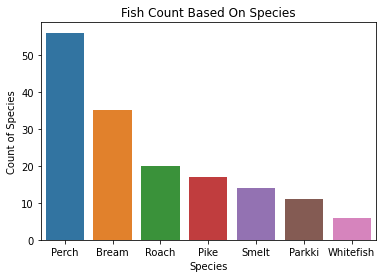

In [8]:
sns.barplot(x= df_sp.index, y = df_sp.Species) # df_sp.index will returns row labels of dataframe
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Fish Count Based On Species')
plt.show()

## Important Points
 
* As you can see our dataset is very small. We have only 6 training example for 'Whitefish' species. 
* Ideal approach would be to divide the dataset and do the prediction for each species. But since we don't have enough data we will ignore the different species during our analysis.
 



## Using Domain Knowledge For Data Cleaning
* Depending on the maximum and minimum weight of fish for each species we can very easily remove the outliers. But because of limited data we are going to ignore the individual species and treat them as one. 
* Now lets use some common sense and find and remove the training data where weight of fish is 0 or negative



In [9]:
df[df.Weight <= 0]

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


Lets drop the training data at row 40.
Note: Anytime we make changes in dataframe we are going to increament the dataframe name by 1.

In [10]:
df1 = df.drop([40])
print('New dimension of dataset is= ', df1.shape)
df1.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Correlation Check
* Correlation helps us investigate and establish relationships between variables
* Note that high amount of correlation between independent variables suggest that linear regression estimation will be unreliable


In [11]:
df1.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
VerticalLen,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
DiagonalLen,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
CrossLen,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

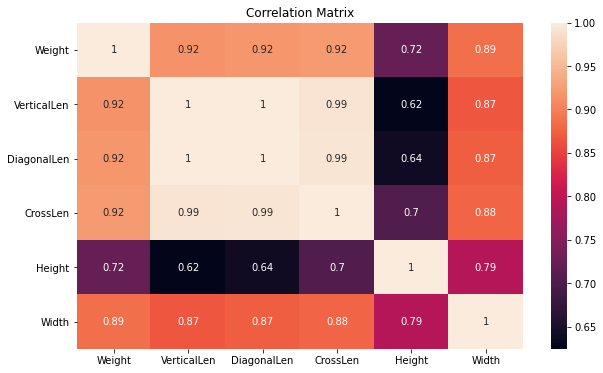

In [12]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

## Reading Correlation Matrix 
* Correlation coefficient range from -1 to +1
* Sign(+/-) indicate the direction and amount indicate the strength of correlation
* +1.00 means perfect positive relationship
* 0.00 means no relationship
* -1.00 means perfect negative relationship
* The correlation between 'VerticalLen', 'DiagonalLen' and 'Crosslen' is almost 1. This will cause 'Multicolinearity' and if we don't take care of it, it may lead to unreliable predictions.
 
Let's drop the 'VerticalLen', 'DiagonalLen' and 'Crosslen' column.
 



In [13]:
df2 = df1.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', df2.shape)
df2.head()

New dimension of dataset is=  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


## Visulization Using Pairplot

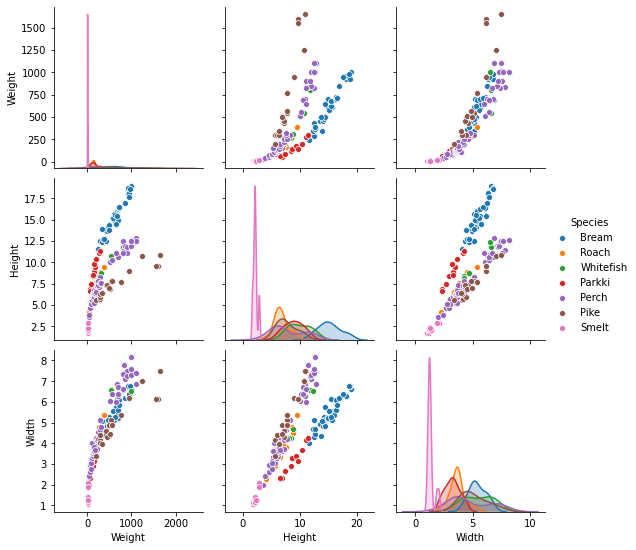

In [14]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

From the above pair plot, we can see that there seems to be some correlations between  Height, Width and the Weight. Note that since we have multiple species the correlation between Height and Width of all species is not exactly linear with Weight.
 
Now, since we have the final dataset ready lets analyze and remove the outliers if any



## Outlier Detection and Removal
 
* Outlier is an extremely high or extremely low value in our data
* We use below formula to identify the outlier
  ```
    ( Greater than Q3 + 1.5 * IQR ) OR ( Lower than Q1 -1.5 * IQR )
 
    where,
    Q1  = First quartile
    Q3  = Third quartile
    IQR = Interquartile range (Q3 - Q1)
  ```
 
* Lets use box plot for outlier visualization. 
* Vertical line on the left side of box plot represent the 'min' value of dataset and vertical line on right side of box plot represent the 'max' value of dataset. Any value which is outside this range is outlier and represented by '*'
 



Text(0.5, 1.0, 'Outlier Detection based on Weight')

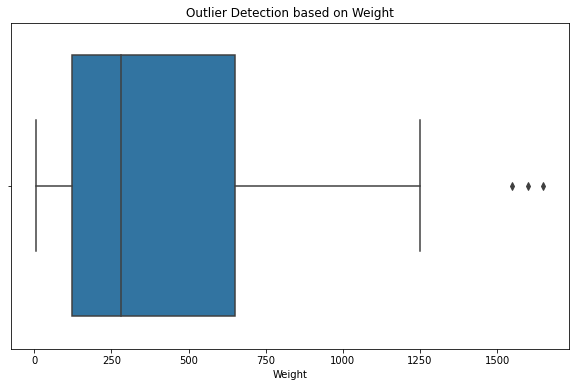

In [15]:
sns.boxplot(x=df2['Weight'])
plt.title('Outlier Detection based on Weight')

From above plot its clear that there are three outlier as per the 'Weight' data. Lets create a function to find the index of these outliers.

In [0]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [17]:
outlier_detection(df2['Weight'])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

So based on 'Weight' data, index 142, 143 and 144 are outliers

Lets check for 'Height' data

Text(0.5, 1.0, 'Outlier Detection based on Height')

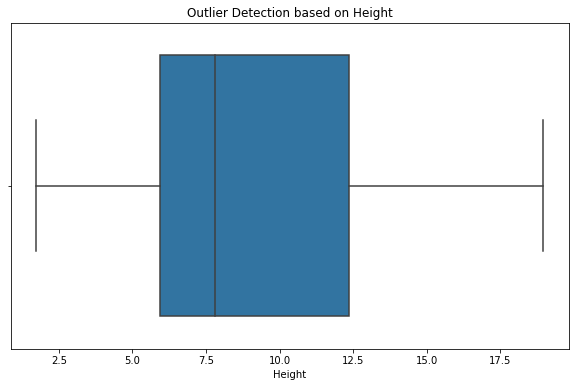

In [18]:
sns.boxplot(x =df2['Height'])
plt.title('Outlier Detection based on Height')

There is no outlier so no need to call 'outlier_detection()' function.

Lets check for 'Width' data

Text(0.5, 1.0, 'Outlier Detection based on Width')

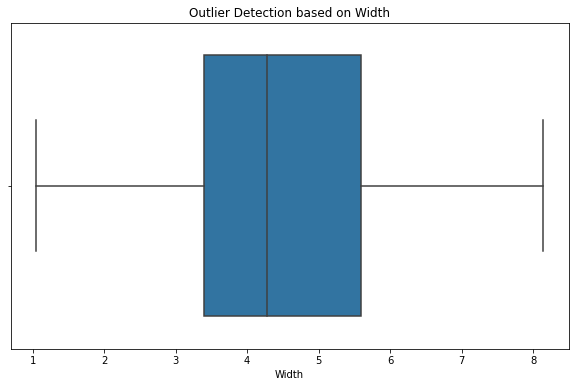

In [19]:
sns.boxplot(x = df2['Width'])
plt.title('Outlier Detection based on Width')

There is no outlier so no need to call 'outlier_detection()' function.

In [20]:
df3 = df2.drop([142,143,144])
df3.shape

(155, 4)

In [21]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


# Step 5: Build Machine Learning Model

## Create Feature Matrix X and Target Variable y

In [22]:
#X = df3.iloc[:,[2,3]] # Select columns using column index
X = df3[['Height','Width']] # Select columns using column name
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [23]:
#y = df3.iloc[:,[1]] # Select columns using column index
y = df3[['Weight']]
y.head(5)

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


## Create test and train dataset
* We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
* We will keep 20% of data for testing and 80% of data for training the model

In [24]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2) 
# Use paramter 'random_state=1' if you want keep results same everytime you execute above code
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (124, 2)
X_test dimension=  (31, 2)
y_train dimension=  (124, 1)
y_train dimension=  (31, 1)


## Ordinary Least Squares Algorithm

* Lets the train the model using Ordinary Least Squares Algorithm
* This is one of the most basic linear regression algorithm.
* Mathematical formula used by ordinary least square algorithm is as below,

   ![ordinary_least_squares_formlua.png](https://github.com/satishgunjal/images/blob/master/ordinary_least_squares_formlua_1.png?raw=true)
* The objective of Ordinary Least Square Algorithm is to minimize the residual sum of squares. Here the term residual means 'deviation of predicted value(Xw) from actual value(y)'
* Note that, problem with ordinary least square model is size of coefficients increase exponentially with increase in model complexity

In [25]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Understanding Training Results
* If training is successful then we get the result like above. Where all the default values used by LinearRgression() model are displayed. If required we can also pass these values in fit method. We are not going to change any of these values for now.
* As per our hypothesis function, 'model' object contains the coef(slope of line) and intercept values

In [26]:
print('coef= ', model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [[ 10.14971941 152.31640013]]
intercept=  [-376.40825622]
score=  0.885540215536848


## Predicting The Test Data
* Check below table for weight from test data and predicted weight by our model
* We will also plot the scatter plot of weight from test data vs predicted weight

In [30]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Weight,150.000000,700.000000,950.000000,125.000000,273.000000,160.000000,690.000000,115.000000,925.000000,390.000000,840.000000,975.000000,345.000000,200.000000,300.000000,130.00000,78.000000,1000.000000,340.000000,51.500000,200.000000,450.000000,250.000000,320.000000,714.000000,197.000000,820.000000,7.500000,620.000000,120.000000,900.000000
Predicted Weight,215.398611,579.473735,772.796951,239.989419,367.330995,267.352268,700.629126,187.439202,842.031617,535.516155,927.608741,840.460271,294.271672,286.625074,383.881392,222.52184,152.107209,742.845888,464.515987,71.039154,327.307435,512.176117,343.335219,427.680882,682.514075,335.853273,869.504735,-179.705985,585.388618,187.429135,843.133943


As you can see from above comparison, predicted weights are negative when actual weights are smaller than 20gm

We can also visualize the above comparison using scatter plots

Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

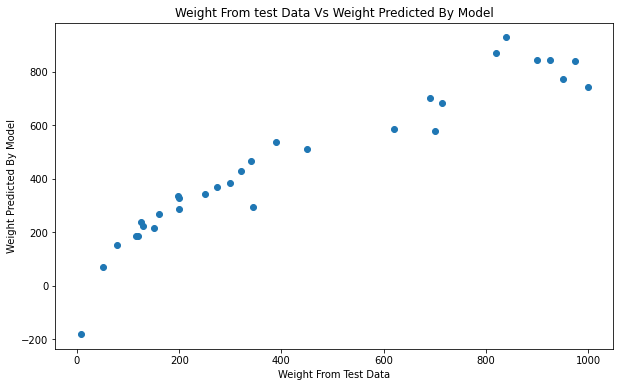

In [31]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

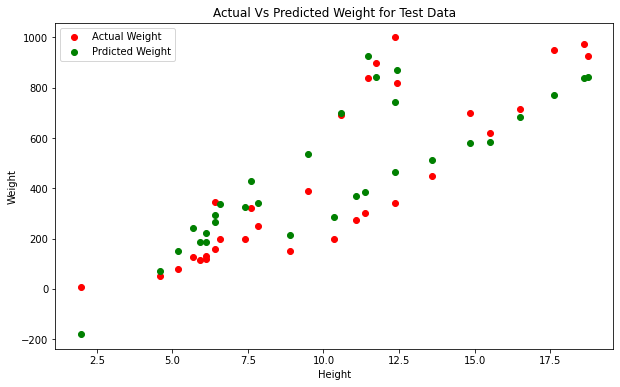

In [28]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Height'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

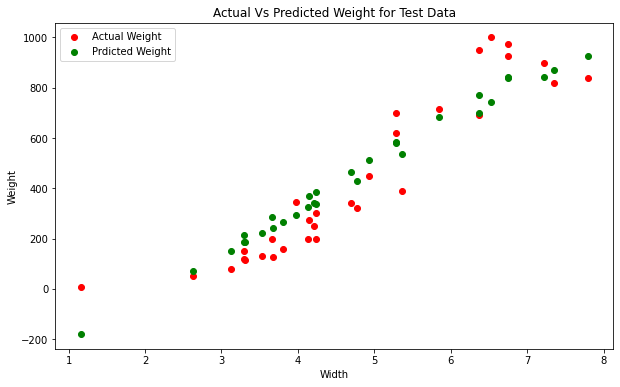

In [29]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Width'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

# Step 6: Evaluating the Model

Plot a histogram of the residuals.

Text(0.5, 1.0, 'Histogram of Residuals')

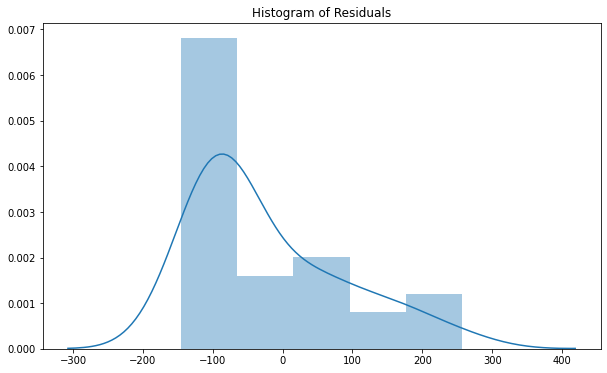

In [32]:
sns.distplot((y_test-model.predict(X_test)))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")

# Conclusion
* As you can see from above results our model score is 88%, which is good enough to start with.
* But one issue with prediction is negative weight values. This behavior is true for smaller(less than 20gm) weight values.
* In machine learning there is no right or wrong way, every time we are solving a problem we make some choices which affect the results.
* We have also made few choices like treating all species as one since we have small dataset.
* I will try again with different approach to try an eliminate the negative weight values.
 

